In [46]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import pandas as pd
import math

In [3]:
# opening one fits file:
file=fits.open('/Users/tharacaba/Desktop/Big_data/spectra2/spec-0281-51614-0230.fits')
file.info()

Filename: /Users/tharacaba/Desktop/Big_data/spectra2/spec-0281-51614-0230.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     135   ()      
  1  COADD         1 BinTableHDU     26   3811R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [4]:
print(file[0].header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  TAI     =        4459476214.86 / 1st row - Number of seconds since Nov 17 1858  RA      =            171.87760 / 1st row - Right ascension of telescope boresighDEC     =            0.112048  / 1st row - Declination of telescope boresight (dEQUINOX =              2000.00 /                                                RADECSYS= 'FK5     '           /                                                TAIHMS  = '06:52:25.67'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = apprTIMESYS = 'tai     '           / TAI, not UTC                                   MJD     =                51614 / MJD of observation                             MJDLIST = '51614   '           /        

In [5]:
print(file[1].header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   32 / length of dimension 1                          NAXIS2  =                 3811 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    8 / number of table fields                         TTYPE1  = 'flux    '                                                            TFORM1  = 'E       '                                                            TTYPE2  = 'loglam  '                                                            TFORM2  = 'E       '                                                            TTYPE3  = 'ivar    '                    

In [6]:
print(file[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


In [7]:
data=Table(file[1].data)
print(data)

   flux   loglam     ivar    and_mask or_mask    wdisp       sky      model  
--------- ------ ----------- -------- -------- ---------- --------- ---------
20.279732  3.582  0.19086683        0        0  1.2900052 6.7626386  35.51027
22.670877 3.5821  0.18860643        0        0  1.2895738  6.797765 35.268105
21.713312 3.5822  0.18760867        0        0  1.2891388 6.8676653 33.898327
23.462408 3.5823   0.1776192        0        0  1.2887042   7.00616  32.32166
25.157804 3.5824  0.16893968        0        0  1.2882771  7.273418  31.13159
  22.8564 3.5825  0.16598634        0        0  1.2878519 7.6286116 31.951685
24.772076 3.5826  0.16060789        0        0  1.2874204  8.025748 30.961252
      ...    ...         ...      ...      ...        ...       ...       ...
  90.4304 3.9624  0.01970335        0 33554432   0.650454  9.657331 57.085686
 83.59837 3.9625  0.01917846        0 33554432 0.65036124  8.822339  57.44696
 79.28659 3.9626 0.060631383        0 33554432    0.65027 7.5455

In [8]:
flux = data['flux'][0]
print(flux)

20.279732


In [10]:
print(file[2].header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1068 / length of dimension 1                          NAXIS2  =                    1 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                  126 / number of table fields                         TTYPE1  = 'SURVEY  '                                                            TFORM1  = '6A      '                                                            TTYPE2  = 'INSTRUMENT'                                                          TFORM2  = '4A      '                                                            TTYPE3  = 'CHUNK   '                    

In [11]:
print(file[2].columns)

ColDefs(
    name = 'SURVEY'; format = '6A'
    name = 'INSTRUMENT'; format = '4A'
    name = 'CHUNK'; format = '16A'
    name = 'PROGRAMNAME'; format = '23A'
    name = 'PLATERUN'; format = '16A'
    name = 'PLATEQUALITY'; format = '8A'
    name = 'PLATESN2'; format = 'E'
    name = 'DEREDSN2'; format = 'E'
    name = 'LAMBDA_EFF'; format = 'E'
    name = 'BLUEFIBER'; format = 'J'
    name = 'ZOFFSET'; format = 'E'
    name = 'SNTURNOFF'; format = 'E'
    name = 'NTURNOFF'; format = 'J'
    name = 'SPECPRIMARY'; format = 'B'
    name = 'SPECLEGACY'; format = 'B'
    name = 'SPECSEGUE'; format = 'B'
    name = 'SPECSEGUE1'; format = 'B'
    name = 'SPECSEGUE2'; format = 'B'
    name = 'SPECBOSS'; format = 'B'
    name = 'BOSS_SPECOBJ_ID'; format = 'J'
    name = 'SPECOBJID'; format = '22A'
    name = 'FLUXOBJID'; format = '19A'
    name = 'BESTOBJID'; format = '19A'
    name = 'TARGETOBJID'; format = '22A'
    name = 'PLATEID'; format = '19A'
    name = 'NSPECOBS'; format = 'I'
    nam

In [12]:
data=Table(file[2].data)
Z = data['Z'][0]
subclass=data['SUBCLASS'][0]
print(subclass, Z)

AGN                   0.04872853


In [13]:
print(file[3].header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   89 / length of dimension 1                          NAXIS2  =                   29 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   19 / number of table fields                         TTYPE1  = 'PLATE   '                                                            TFORM1  = 'J       '                                                            TTYPE2  = 'MJD     '                                                            TFORM2  = 'J       '                                                            TTYPE3  = 'FIBERID '                    

In [14]:
print(file[3].columns)

ColDefs(
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'LINENAME'; format = '13A'
    name = 'LINEWAVE'; format = 'D'
    name = 'LINEZ'; format = 'E'
    name = 'LINEZ_ERR'; format = 'E'
    name = 'LINESIGMA'; format = 'E'
    name = 'LINESIGMA_ERR'; format = 'E'
    name = 'LINEAREA'; format = 'E'
    name = 'LINEAREA_ERR'; format = 'E'
    name = 'LINEEW'; format = 'E'
    name = 'LINEEW_ERR'; format = 'E'
    name = 'LINECONTLEVEL'; format = 'E'
    name = 'LINECONTLEVEL_ERR'; format = 'E'
    name = 'LINENPIXLEFT'; format = 'J'
    name = 'LINENPIXRIGHT'; format = 'J'
    name = 'LINEDOF'; format = 'E'
    name = 'LINECHI2'; format = 'E'
)


In [15]:
data=Table(file[3].data)
print(data)

PLATE  MJD  FIBERID    LINENAME   ... LINENPIXRIGHT  LINEDOF   LINECHI2 
----- ----- ------- ------------- ... ------------- --------- ----------
  281 51614     230 Ly_alpha      ...             0       0.0       -1.0
  281 51614     230 N_V 1240      ...             0       0.0       -1.0
  281 51614     230 C_IV 1549     ...             0       0.0       -1.0
  281 51614     230 He_II 1640    ...             0       0.0       -1.0
  281 51614     230 C_III] 1908   ...             0       0.0       -1.0
  281 51614     230 Mg_II 2799    ...             0       0.0       -1.0
  281 51614     230 [O_II] 3725   ...             6 11.903891   8.799791
  ...   ...     ...           ... ...           ...       ...        ...
  281 51614     230 [O_I] 6363    ...             7 11.903891  6.0457335
  281 51614     230 [N_II] 6548   ...             7 11.903891   63.90335
  281 51614     230 H_alpha       ...             6  9.706522   71.20654
  281 51614     230 [N_II] 6583   ...             6

In [16]:
lines=data['LINENAME'][1]
print(lines)

N_V 1240     


In [19]:
data = Table(file[2].data)
ra = data['PLUG_RA'][0]
dec = data['PLUG_DEC'][0]
sn = data['SN_MEDIAN_ALL'][0]
print(ra, dec, sn)

171.10893 -0.42707792 38.422718


In [39]:
data = Table(file[3].data)
o = data[data['LINENAME'] == '[O_III] 5007 ']
o

PLATE,MJD,FIBERID,LINENAME,LINEWAVE,LINEZ,LINEZ_ERR,LINESIGMA,LINESIGMA_ERR,LINEAREA,LINEAREA_ERR,LINEEW,LINEEW_ERR,LINECONTLEVEL,LINECONTLEVEL_ERR,LINENPIXLEFT,LINENPIXRIGHT,LINEDOF,LINECHI2
int32,int32,int32,str13,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32
281,51614,230,[O_III] 5007,5008.239637728127,0.048728485,2.6806267e-06,151.70143,0.8145126,2344.4995,16.502695,34.656075,0.22470695,67.65047,0.037545074,7,7,13.403891,412.00793


In [44]:
h = data[data['LINENAME'] == 'H_beta       ']
h

PLATE,MJD,FIBERID,LINENAME,LINEWAVE,LINEZ,LINEZ_ERR,LINESIGMA,LINESIGMA_ERR,LINEAREA,LINEAREA_ERR,LINEEW,LINEEW_ERR,LINECONTLEVEL,LINECONTLEVEL_ERR,LINENPIXLEFT,LINENPIXRIGHT,LINEDOF,LINECHI2
int32,int32,int32,str13,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32
281,51614,230,H_beta,4862.682993731257,0.048728827,2.6806276e-06,127.62969,1.2499753,242.46022,6.58541,4.314173,0.11478203,56.200855,0.031190699,6,5,9.706522,25.699436


In [47]:
r = math.log10(2344.4995/242.46022)
r

0.9854096495647764

In [48]:
data = Table(file[1].data)
data

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
20.279732,3.582,0.19086683,0,0,1.2900052,6.7626386,35.51027
22.670877,3.5821,0.18860643,0,0,1.2895738,6.797765,35.268105
21.713312,3.5822,0.18760867,0,0,1.2891388,6.8676653,33.898327
23.462408,3.5823,0.1776192,0,0,1.2887042,7.00616,32.32166
25.157804,3.5824,0.16893968,0,0,1.2882771,7.273418,31.13159
22.8564,3.5825,0.16598634,0,0,1.2878519,7.6286116,31.951685
...,...,...,...,...,...,...,...
90.4304,3.9624,0.01970335,0,33554432,0.650454,9.657331,57.085686
83.59837,3.9625,0.01917846,0,33554432,0.65036124,8.822339,57.44696


In [49]:
fl = data[['flux', 'loglam']]
fl

flux,loglam
float32,float32
20.279732,3.582
22.670877,3.5821
21.713312,3.5822
23.462408,3.5823
25.157804,3.5824
22.8564,3.5825
...,...
90.4304,3.9624
83.59837,3.9625


In [50]:
# Exponentiate the values of 'loglam' to the base 10
fl['lam'] = 10 ** fl['loglam']

# Create a new DataFrame with the transformed column and another column
new_fl = fl[['flux', 'lam']]

# Display the new DataFrame
new_fl

flux,lam
float32,float32
20.279732,3819.4429
22.670877,3820.3215
21.713312,3821.2024
23.462408,3822.0815
25.157804,3822.963
22.8564,3823.8423
...,...
90.4304,9170.646
83.59837,9172.762


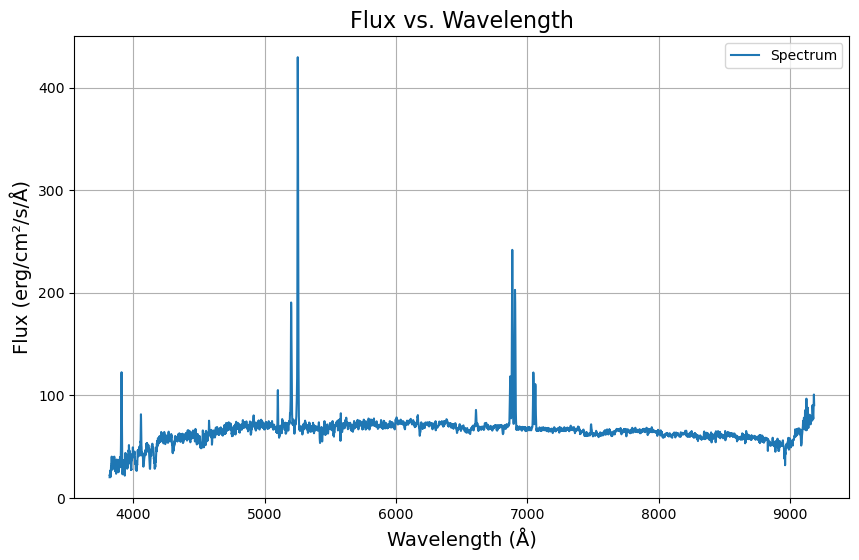

In [51]:
# Plot flux vs. wavelength
plt.figure(figsize=(10, 6))
plt.plot(fl['lam'], fl['flux'], label='Spectrum')
plt.xlabel('Wavelength (Å)', fontsize=14)
plt.ylabel('Flux (erg/cm²/s/Å)', fontsize=14)
plt.title('Flux vs. Wavelength', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

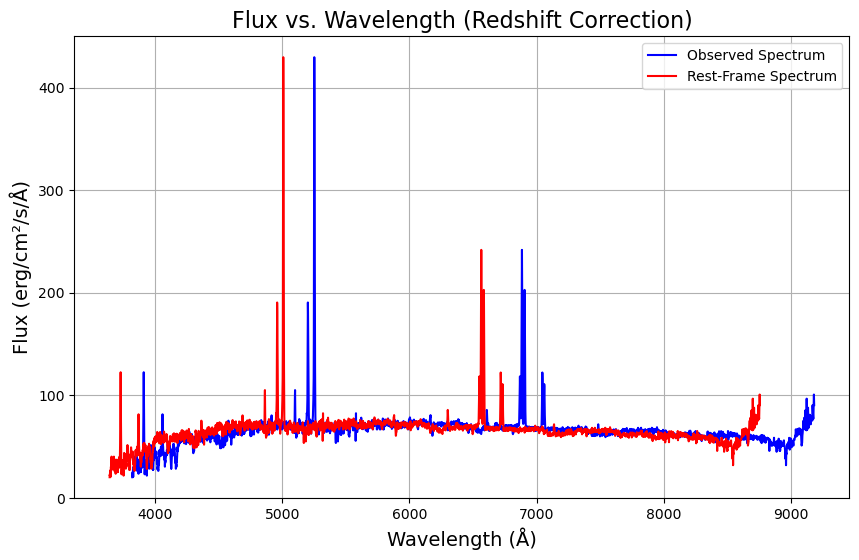

In [53]:
data = Table(file[2].data)
z = data['Z'][0]

# Apply redshift correction
fl['corrlam'] = fl['lam'] / (1 + z)

# Plot original and redshift-corrected spectrum
plt.figure(figsize=(10, 6))
plt.plot(fl['lam'], fl['flux'], label='Observed Spectrum', color='blue')
plt.plot(fl['corrlam'], fl['flux'], label='Rest-Frame Spectrum', color='red')
plt.xlabel('Wavelength (Å)', fontsize=14)
plt.ylabel('Flux (erg/cm²/s/Å)', fontsize=14)
plt.title('Flux vs. Wavelength (Redshift Correction)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


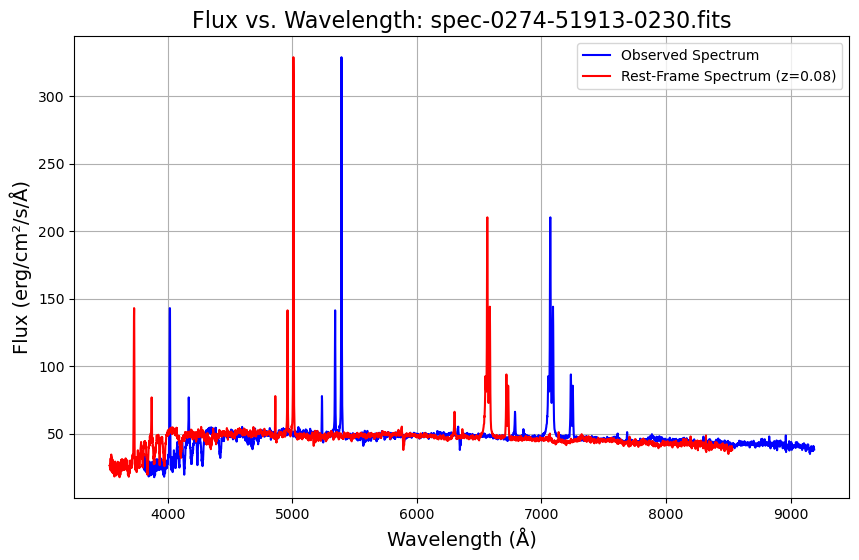

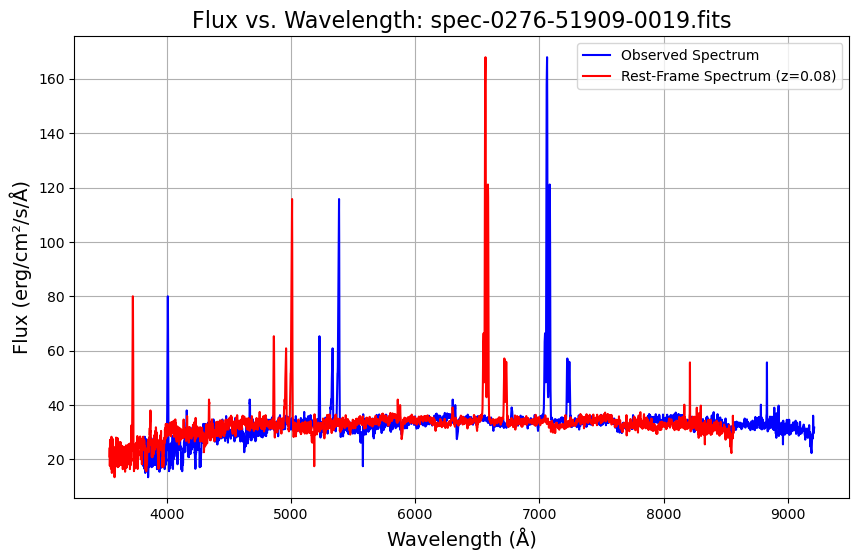

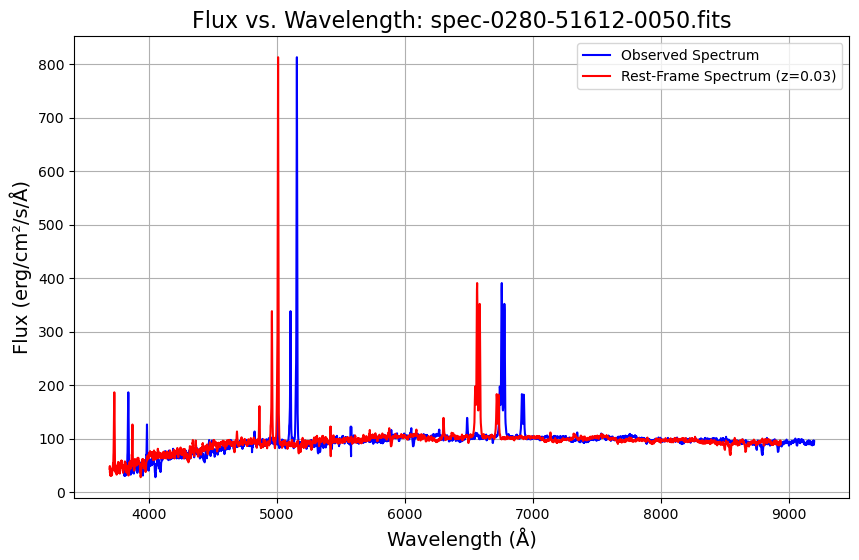

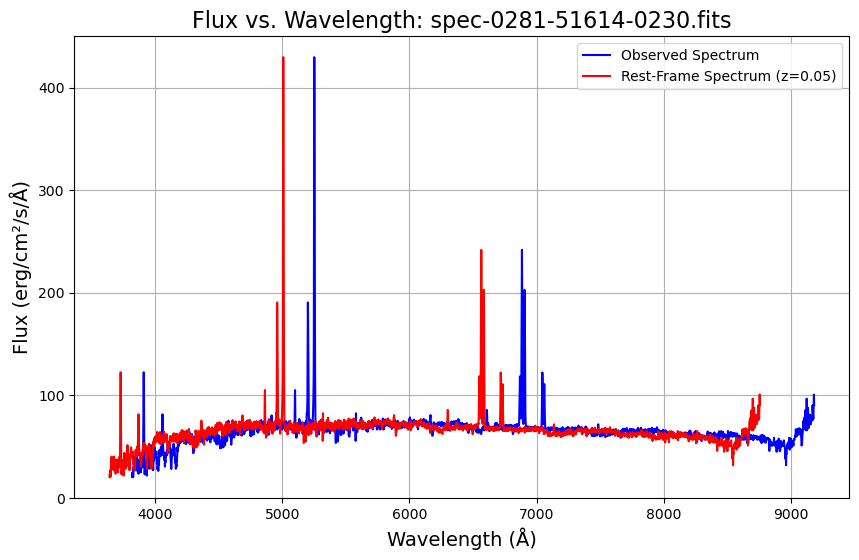

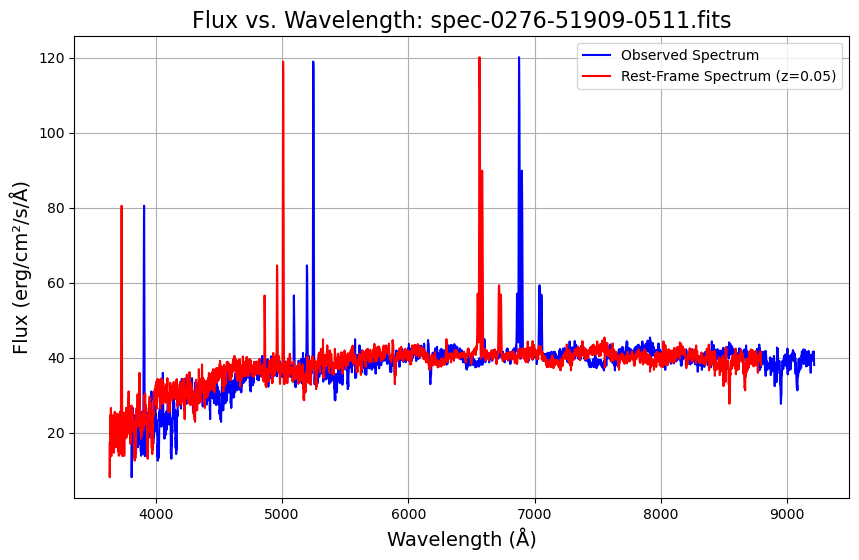

In [55]:
import os

# Define the directory containing FITS files
fits_dir = "/Users/tharacaba/Desktop/Big_data/spectra2/" 
fits_files = [f for f in os.listdir(fits_dir) if f.endswith(".fits")]

# Process each FITS file
for fits_file in fits_files:
    # Open the FITS file
    file_path = os.path.join(fits_dir, fits_file)
    with fits.open(file_path) as file:
        # Extract spectral data
        data = Table(file[1].data)
        fl = data[['flux', 'loglam']]
        
        # Exponentiate loglam to get wavelength in Ångströms
        fl['lam'] = 10 ** fl['loglam']
        
        # Extract redshift from second HDU
        z_data = Table(file[2].data)
        z = z_data['Z'][0]
        
        # Apply redshift correction
        fl['corrlam'] = fl['lam'] / (1 + z)
        
        # Plot original and redshift-corrected spectrum
        plt.figure(figsize=(10, 6))
        plt.plot(fl['lam'], fl['flux'], label='Observed Spectrum', color='blue')
        plt.plot(fl['corrlam'], fl['flux'], label=f'Rest-Frame Spectrum (z={z:.2f})', color='red')
        plt.xlabel('Wavelength (Å)', fontsize=14)
        plt.ylabel('Flux (erg/cm²/s/Å)', fontsize=14)
        plt.title(f'Flux vs. Wavelength: {fits_file}', fontsize=16)
        plt.legend()
        plt.grid(True)